In [ ]:
import numpy             as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px 
!pip install millify
from millify     import millify
from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS
from textblob import TextBlob
import re
from collections import Counter

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from IPython.display import Markdown as md

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for millify: filename=millify-0.1.1-py3-none-any.whl size=1866 sha256=bbfa041d12545ae577a9f26b8b97ef77778c2731f18e31e60d09356482715fc1
  Stored in directory: /root/.cache/pip/wheels/38/26/25/c2a8bb99a5cf348903e6ac35a29878e221cc9daeb698545148
Successfully built millify


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
import nltk
import re
import string
!pip install neattext
import neattext.functions as nfx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 7.4 MB/s 


In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/upwork work/train data.csv')
data.head()

,Card Num,Card Cat,Card Num prev 1,Card Num prev 2,Card Num prev 3,Card Cat prev 1,Card Cat prev 2,Card Cat prev 3,Card Cat prev 4,Card Cat prev 5,...,Card Cat prev 8,Card Cat prev 9,Card Cat prev 10,prev 3 card,prev 4 card,prev 5 card,A occur,B occur,C occur,Target
0,13,C,,,,,,,,,...,,,,,,,1,1,0,B
1,10,B,13.0,,,C,,,,,...,,,,,,,2,0,1,C
2,11,C,10.0,13.0,,B,C,,,,...,,,,CBC,,,3,1,0,B
3,9,B,11.0,10.0,13.0,C,B,C,,,...,,,,BCB,CBCB,,4,0,1,B
4,7,B,9.0,11.0,10.0,B,C,B,C,,...,,,,CBB,BCBB,CBCBB,5,0,2,B


In [ ]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
nltk.download('stopwords')
all_stop_words = stopwords.words('english')
nltk.download('stopwords')
all_stop_words.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


NameError: ignored

In [ ]:
data['OriginalTweet'] = data['OriginalTweet'].apply(lambda x: clean_text(x))

In [ ]:
from sklearn.model_selection import train_test_split

train , valid = train_test_split(data,test_size = 0.2,random_state=0,stratify = data.Sentiment.values)
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

AttributeError: ignored

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.OriginalTweet.values)
X_valid = vectorizer.transform(valid.OriginalTweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (3038, 10246)
X_train.shape :  (760, 10246)
y_train.shape :  (3038,)
y_valid.shape :  (760,)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
dir(GridSearchCV)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'classes_',
 'decision_function',
 'fit',
 'get_params',
 'inverse_transform',
 'n_features_in_',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'score_samples',
 'set_params',
 'transform']

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.8887425938117183
Validation accuracy Score :  0.37105263157894736
                    precision    recall  f1-score   support

Extremely Negative       0.25      0.50      0.33        58
Extremely Positive       0.22      0.46      0.29        57
          Negative       0.60      0.35      0.44       358
           Neutral       0.14      0.55      0.22        31
          Positive       0.45      0.34      0.39       256

          accuracy                           0.37       760
         macro avg       0.33      0.44      0.33       760
      weighted avg       0.47      0.37      0.39       760



In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9206714944042133
Validation accuracy Score :  0.40131578947368424
                    precision    recall  f1-score   support

Extremely Negative       0.11      0.59      0.19        22
Extremely Positive       0.16      0.73      0.26        26
          Negative       0.56      0.35      0.43       336
           Neutral       0.64      0.49      0.55       162
          Positive       0.41      0.36      0.39       214

          accuracy                           0.40       760
         macro avg       0.37      0.50      0.36       760
      weighted avg       0.51      0.40      0.43       760



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print(f"Best: {grid_result.best_score_:.3f} using {grid_result.best_params_}")

Best: 0.215 using {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(random_state=0, early_stopping=True, verbose=2)
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.60507005
Validation score: 0.266447
Iteration 2, loss = 1.38969229
Validation score: 0.299342
Iteration 3, loss = 1.17149799
Validation score: 0.355263
Iteration 4, loss = 0.93109569
Validation score: 0.388158
Iteration 5, loss = 0.70224271
Validation score: 0.375000
Iteration 6, loss = 0.51729569
Validation score: 0.398026
Iteration 7, loss = 0.38247025
Validation score: 0.411184
Iteration 8, loss = 0.28675369
Validation score: 0.401316
Iteration 9, loss = 0.21992406
Validation score: 0.401316
Iteration 10, loss = 0.17209753
Validation score: 0.407895
Iteration 11, loss = 0.13768575
Validation score: 0.394737
Iteration 12, loss = 0.11230958
Validation score: 0.401316
Iteration 13, loss = 0.09287342
Validation score: 0.401316
Iteration 14, loss = 0.07798121
Validation score: 0.401316
Iteration 15, loss = 0.06640995
Validation score: 0.394737
Iteration 16, loss = 0.05722837
Validation score: 0.394737
Iteration 17, loss = 0.04974336
Validation score: 0.391447
Iterat

MLPClassifier(early_stopping=True, random_state=0, verbose=2)

MLP Accuracy: 0.40131578947368424
                    precision    recall  f1-score   support

Extremely Negative       0.44      0.30      0.36       118
Extremely Positive       0.50      0.27      0.35       120
          Negative       0.36      0.50      0.42       208
           Neutral       0.53      0.45      0.49       124
          Positive       0.35      0.42      0.38       190

          accuracy                           0.40       760
         macro avg       0.44      0.39      0.40       760
      weighted avg       0.42      0.40      0.40       760



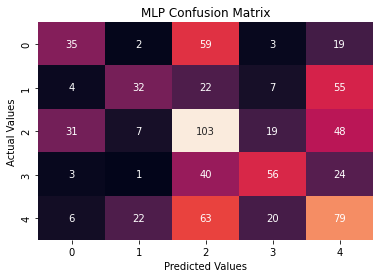

In [ ]:
y_pred_mlp=mlp.predict(X_valid)
cm_mlp = confusion_matrix(y_valid, y_pred_mlp)
print('MLP Accuracy:', accuracy_score(y_valid, y_pred_mlp))
print(classification_report(y_valid, y_pred_mlp))
sns.heatmap(cm_mlp, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('MLP Confusion Matrix')
plt.show()

## SVM is the best model of prediction with score of 
# Training accuracy Score    :  0.9206714944042133
# Validation accuracy Score :  0.40131578947368424